<div class="row">
    <div class="column">
        <img src="https://datasciencecampus.ons.gov.uk/wp-content/uploads/sites/10/2017/03/data-science-campus-logo-new.svg"
             alt="Data Science Campus Logo"
             align="right" 
             width = "340"
             style="margin: 0px 60px"
             />
    </div>
    <div class="column">
        <img src="https://cdn.ons.gov.uk/assets/images/ons-logo/v2/ons-logo.svg"
             alt="ONS Logo"
             align="left" 
             width = "420"
             style="margin: 0px 30px"/>
    </div>


---
<center><h1><font size=6>Chapter 2 Case Study<font></h1></center>
<center><h1><font size=7>Regression<font></h1></center>
    
*By Dr. Laurie Baker and Dr. Daniel J. Lewis*


# Introduction

Let's look at another dataset with interesting considerations for undergraduate students.

The dataset consists of salaries from 6 different departments from English to Biology. The data includes the variables:

* **salary** the current salary
* **experience** the number of years of experience
* **department** what department the individual belongs to.

Let's load the libraries we'll need and then the data.

**Libraries needed**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data plotting
import seaborn as sns # data visualisation and plotting
import statsmodels.api as sm # statistical modelling package
import statsmodels.formula.api as smf # statistical modelling package with R-like formulas
import scipy.stats as stats
import math

from sklearn import datasets, linear_model # fetching iris dataset and linear model functions
from sklearn.metrics import mean_squared_error, r2_score

# Seaborn plot default configurations
sns.set_style("white")

# set the custom size for my graphs
sns.set(rc={'figure.figsize':(8.7,6.27)})

Loading the data:


In [3]:
salaries = pd.read_csv("../../data/faculty-data.csv") 

## Explore the data

* What are the variables in our data set?


In [4]:
salaries.columns

Index(['ids', 'department', 'bases', 'experience', 'raises', 'salary'], dtype='object')

* What does each row in the data.frame represent?

In [5]:
salaries.head()

,ids,department,bases,experience,raises,salary
0,1,sociology,39012.062997,3,2122.325646,45379.039935
1,2,biology,51872.123941,9,541.643975,56746.919719
2,3,english,64341.126468,3,543.178641,65970.662390
3,4,informatics,68975.266754,2,1736.946839,72449.160433
4,5,statistics,78262.278702,9,469.943148,82491.767032



* How many departments are in the data? How many employees are in each department?


In [9]:
len(salaries.department.unique())

5

In [10]:
salaries.department.unique()

array(['sociology', 'biology', 'english', 'informatics', 'statistics'],
      dtype=object)

In [11]:
salaries.department.value_counts()

biology        20
informatics    20
statistics     20
sociology      20
english        20
Name: department, dtype: int64

### Plotting the data

Create plots of the data to visualise:

* What is the range in salaries?

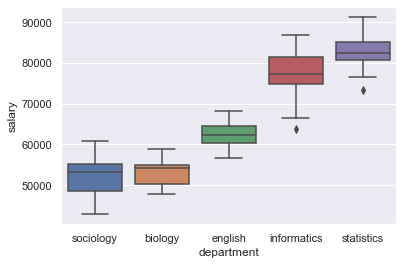

In [12]:
sns.boxplot(data = salaries, y = 'salary', x = 'department')

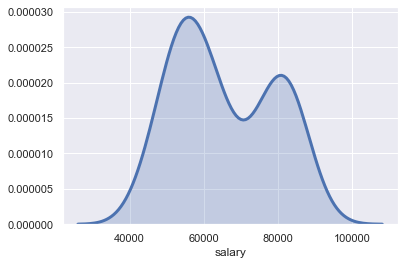

In [13]:
sns.distplot(salaries['salary'],
            hist=False,
            kde=True,
            kde_kws={'shade': True,
                    'linewidth': 3})

* How many employees do we have salaries for from each department in the dataset?

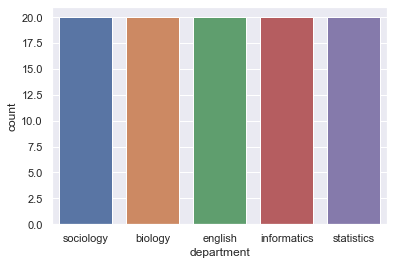

In [14]:
sns.countplot(x='department',
             data=salaries)

* How does salary vary with experience?

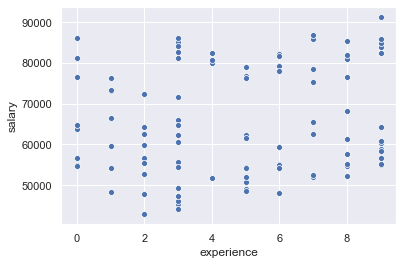

In [15]:
sns.scatterplot(data = salaries,
               x = 'experience',
               y = 'salary')

* Does salary vary with experience by department?

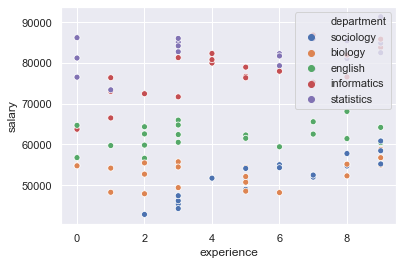

In [19]:
sns.scatterplot(data = salaries,
               x = 'experience',
               y = 'salary',
               hue = 'department')
plt.legend(loc = 'upper right')

## Exploring Hypotheses

- Construct linear models that explore the following hypotheses:


### The relationship between salary and experience is the same across all departments.

* What is the response variable? What is the explanatory variable?

In [20]:
model1 = smf.ols(formula='salary ~ experience', data = salaries)

results_mod1 = model1.fit()

print(results_mod1.summary())


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.238
Date:                Wed, 27 Jan 2021   Prob (F-statistic):              0.138
Time:                        10:54:09   Log-Likelihood:                -1089.2
No. Observations:                 100   AIC:                             2182.
Df Residuals:                      98   BIC:                             2188.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.215e+04   2564.318     24.238      0.0

* Intercept interpretation (starting salary):

In [21]:
print("The intercept = ", results_mod1.params['Intercept'])

The intercept =  62154.02335773204


* Slope interpretation: for every year of experience the amount of extra money make.

In [22]:
print("The slope = ", results_mod1.params['experience'])

The slope =  683.4793533925672


### Plotting the fitted model

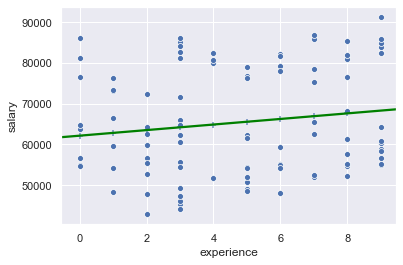

In [24]:
salary_scatter = sns.scatterplot(data = salaries,
                                x = 'experience',
                                y = 'salary')


x = np.arange(9)
y = results_mod1.params['experience']*x + results_mod1.params['Intercept']


salary_scatter = sns.regplot(x = x, y = y, marker = "+", line_kws={"color": "green"})
salary_scatter

### Plot the residuals

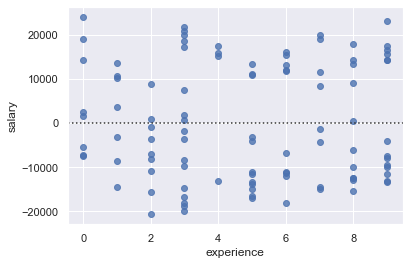

In [25]:
sns.residplot(data=salaries,
             x = 'experience',
             y = 'salary')



## Each department has a different starting salary but the increase in salary with experience is the same.

* Construct a linear model to explore the above hypothesis.

In [26]:
model2 = smf.ols(formula='salary ~ experience + C(department)', data = salaries)

results_mod2 = model2.fit()

print(results_mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     222.0
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.97e-50
Time:                        11:06:49   Log-Likelihood:                -962.82
No. Observations:                 100   AIC:                             1938.
Df Residuals:                      94   BIC:                             1953.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

If someone works in a department for 6 years, will they have a higher salary if they are in the biology or the sociology department?

In [27]:
results_mod2.params['experience']*6 + results_mod2.params['Intercept']






54266.86195890707

In [28]:
results_mod2.params['experience']*6 + results_mod2.params['Intercept'] + results_mod2.params['C(department)[T.sociology]']

52333.29315029024

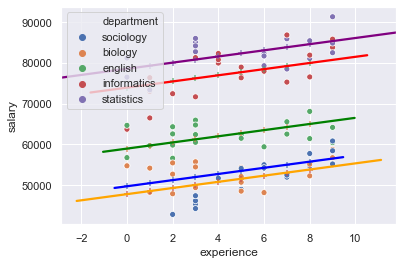

In [30]:
salary_scatter = sns.scatterplot(data = salaries,
                                x = 'experience',
                                y = 'salary',
                                hue = 'department')

a = results_mod2.params['experience']
b_biology = results_mod2.params['Intercept']
b_english = results_mod2.params['Intercept'] + results_mod2.params['C(department)[T.english]']
b_informatics = results_mod2.params['Intercept'] + results_mod2.params['C(department)[T.informatics]']
b_sociology = results_mod2.params['Intercept'] + results_mod2.params['C(department)[T.sociology]']
b_statistics = results_mod2.params['Intercept'] + results_mod2.params['C(department)[T.statistics]']



x = np.arange(9)
y = a*x + b_biology
y2 = a*x + b_english
y3 = a*x + b_informatics
y4 = a*x + b_sociology
y5 = a*x + b_statistics





salary_scatter = sns.regplot(x = x, y = y, marker = "+", line_kws={"color": "blue"})
salary_scatter = sns.regplot(x = x, y = y2, marker = "+", line_kws={"color": "green"})
salary_scatter = sns.regplot(x = x, y = y3, marker = "+", line_kws={"color": "red"})
salary_scatter = sns.regplot(x = x, y = y4, marker = "+", line_kws={"color": "orange"})
salary_scatter = sns.regplot(x = x, y = y5, marker = "+", line_kws={"color": "purple"})


salary_scatter

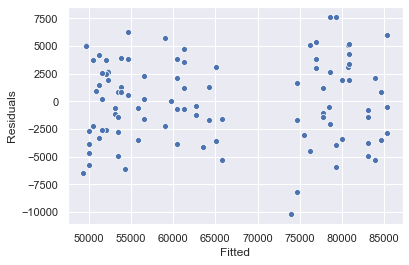

In [32]:
residual2 = results_mod2.resid
fitted2 = results_mod2.fittedvalues

resid2_plot = sns.scatterplot(x = fitted2, y = residual2)
resid2_plot.set(xlabel='Fitted', ylabel='Residuals')
resid2_plot

## Each department has different starting salaries and salaries increase at different rates.

* Construct a linear model to explore the above hypothesis.

In [33]:
model3 = smf.ols(formula='salary ~ experience*C(department)', data = salaries)

results_mod3 = model3.fit()

print(results_mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     159.2
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           2.65e-51
Time:                        11:28:42   Log-Likelihood:                -948.90
No. Observations:                 100   AIC:                             1918.
Df Residuals:                      90   BIC:                             1944.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

* What is the predicted salary with 7 years of experience in Biology?

In [34]:
results_mod3.params['experience']*7 + results_mod3.params['Intercept']

53724.2629467453

* What is the predicted salary for someone with 7 years of experience in Sociology?

In [1]:
(results_mod3.params['experience'] + results_mod3.params['experience:C(department)[T.sociology]'])*7 \ 
+ results_mod3.params['Intercept'] + results_mod3.params['C(department)[T.sociology]']

SyntaxError: unexpected character after line continuation character (<ipython-input-1-be4053caf640>, line 1)

* Which department gets the highest raises (biggest slope)?

In [38]:
(results_mod3.params['experience'] + results_mod3.params['experience:C(department)[T.sociology]'])

1941.1180412513272

* Which department has the highest starting salary (biggest intercept)?

In [41]:
results_mod3.params['C(department)[T.statistics]']

28652.120139615126

### Comparing the models

* Which model has the best fit? Justify.

In [42]:
print("AIC Model 1 = ", results_mod1.aic, "\nAIC Model 2 = ", results_mod2.aic, "\nAIC Model 3 = ", results_mod3.aic)




AIC Model 1 =  2182.409691980974 
AIC Model 2 =  1937.6412740676572 
AIC Model 3 =  1917.801552808499
